In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_palette('deep')
plt.rcParams['text.usetex'] = True

In [2]:
totalsize = [1000001]
V = [0.0005]
omega = [0,0.1]
disorder = [2]

In [3]:
p = {}
w = {}
TIME = {}
CORR = {}

for i in totalsize:
    for j in V:
        for k in omega:
            for l in disorder:
                w["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_w_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                p["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_p_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                TIME["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_TIME_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))
                CORR["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_CORR_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))


In [6]:
phases = np.array([0,6])
norm2 = Normalize(vmin=-np.pi, vmax=np.pi)
cmap = plt.get_cmap('magma')
sm = ScalarMappable(norm=norm2, cmap=cmap)
sm.set_clim(np.min(phases), np.max(phases))
sm.set_array([])

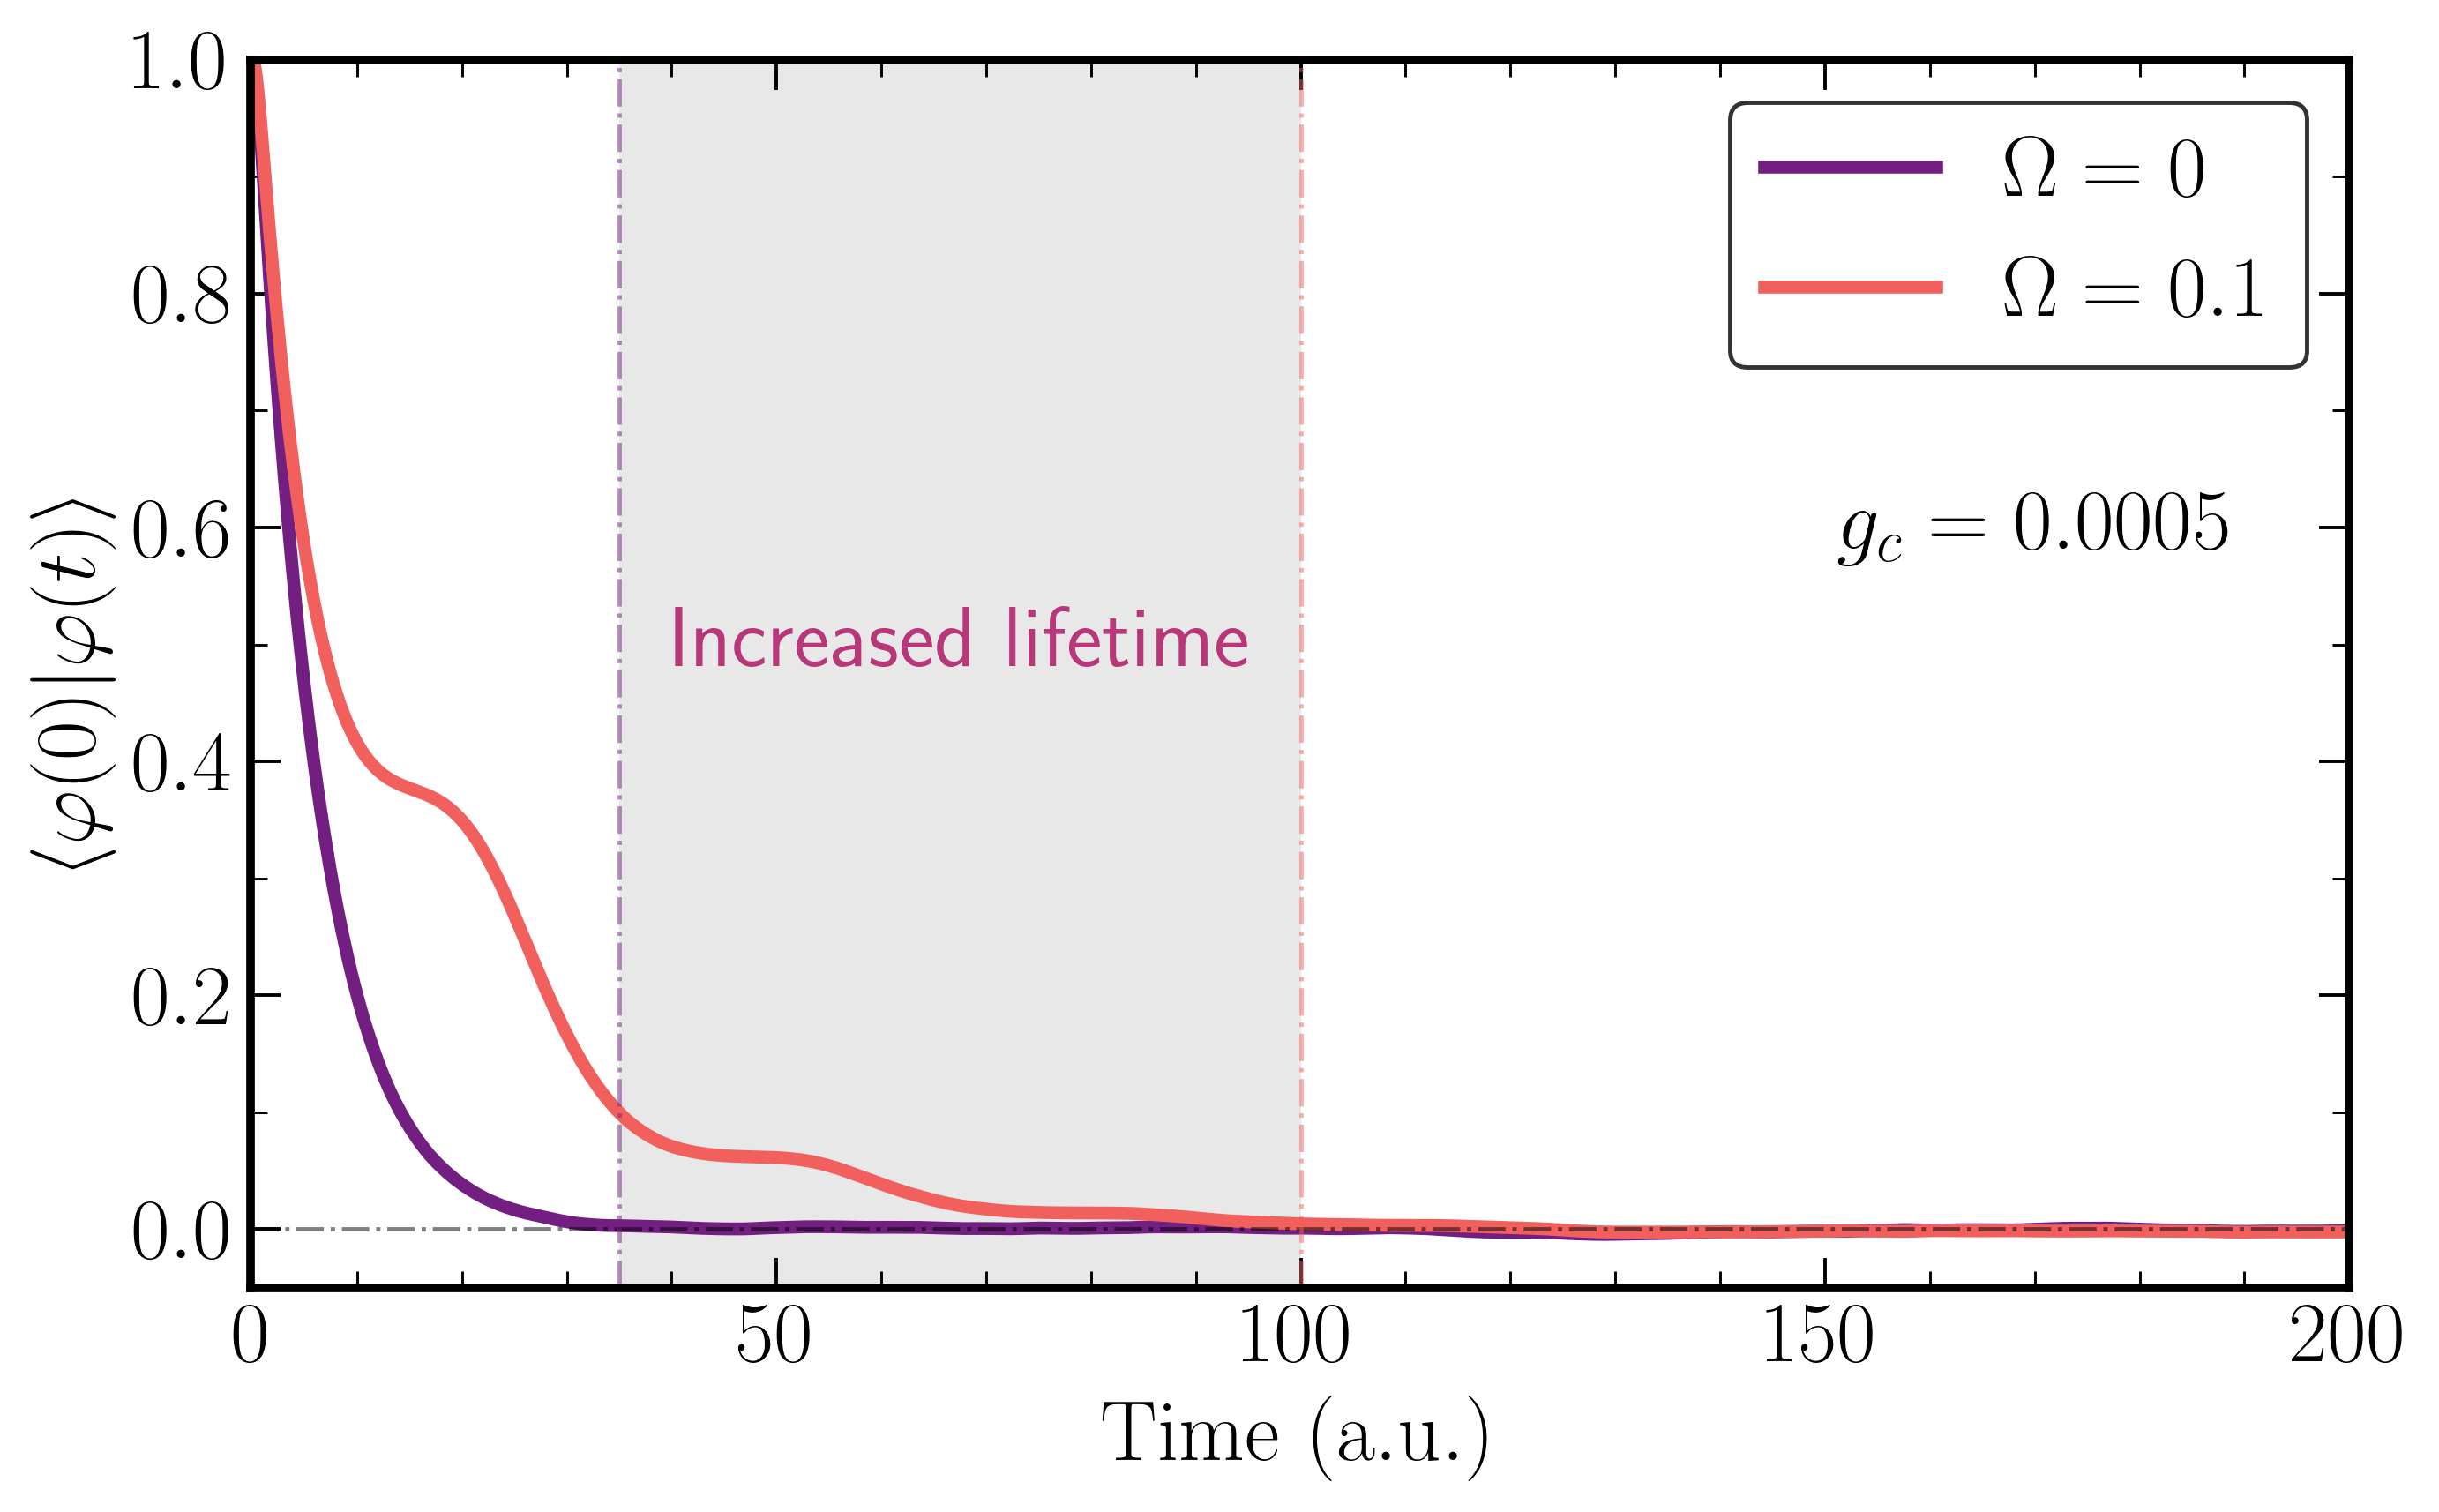

In [11]:
fig, axes = plt.subplots(1, 1, sharex=True,sharey=True, figsize=(8, 5), gridspec_kw={'hspace': 0},dpi=350)
color = sm.to_rgba(2)
line1, = axes.plot(TIME["1000001,0.0005,{0},2".format(omega[0])], CORR["1000001,0.0005,{0},2".format(omega[0])], linewidth=3, color=color, label=r'$\Omega=0$')


color = sm.to_rgba(4)

line2, = axes.plot(TIME["1000001,0.0005,{0},2".format(omega[1])], CORR["1000001,0.0005,{0},2".format(omega[1])], linewidth=3, color=color, label=r'$\Omega=0.1$')
plt.xlabel(r'$\mathrm{Time \ (a.u.)}$',fontsize=20)

axes.axhline(0, color='black', alpha=0.5,linestyle='-.', linewidth=1)

color = sm.to_rgba(4)
axes.axvline(100, color=color, alpha=0.5,linestyle='-.', linewidth=1)
color = sm.to_rgba(2)
axes.axvline(35, color=color, alpha=0.5,linestyle='-.', linewidth=1)


# 定义两个垂直 x 刻度之间的区域
x_start = 35
x_end = 100

# 在两个垂直 x 刻度之间的区域上色
axes.axvspan(x_start, x_end, facecolor='lightgray', alpha=0.5)

# 添加文本到指定位置
color = sm.to_rgba(3)
axes.text(68, 0.5, 'Increased lifetime', fontsize=20, ha='center', va='center', color=color)

axes.text(170, 0.6, r'$g_c=0.0005$', fontsize=20, ha='center', va='center', color='black')

# 添加图例
ax = axes
minor_locator_x = MultipleLocator(10)
minor_locator_y = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minor_locator_x)
ax.yaxis.set_minor_locator(minor_locator_y)
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.set_ylim(-0.05,1)
ax.set_xlim(-0.2,200)
ax.set_ylabel(r'$\langle \varphi(0)| \varphi(t) \rangle$',fontsize=20)
# 设置整个图形的边框粗度
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(axis='both', which='major', labelsize=20, size=7)
# 增加次刻度的高度
ax.tick_params(axis='both', which='minor', length=4)

# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False, fontsize=20)
plt.legend(edgecolor='black',fontsize=20)
plt.tight_layout()
